In [4]:
from acquire import acquire

In [18]:
# Standard Data Science Utility Belt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# User defined methods
from acquire import acquire
from prepare import prepare


# Modeling Stuff

import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk import sent_tokenize
import sklearn.preprocessing
import re
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from model import  vectorizer_split, tfidf_split, test_a_model, make_models_and_print_metrics_test_data, print_metrics


# Viewing Options
pd.set_option("display.max_rows", None, "display.max_columns", None) 
pd.reset_option("display.max_rows", "display.max_columns")

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# Project Planning

### Project and Goals

    The goal of this project is to...

### Original Hypothesis

    The best predictor is going to be that ReadMe.mds will reference their own language within the text.

### Domain Knowledge Quick Tip
    You can add a README file to a repository to communicate important information about your project. A README, along with a repository license, citation file, contribution guidelines, and a code of conduct, communicates expectations for your project and helps you manage contributions
    
    A README is often the first item a visitor will see when visiting your repository. README files typically include information on: What the project does, why the project is useful, how users can get started with the project, where users can get help with your project, and who maintains and contributes to the project

### The Plan

    Acquire repos names by web scrapping
    use the github api to pull the data using the prebuilt acquire.py script
    clean the data
    explore the data
    model the data
    evaluate the data
    run the best model
    deliverables
    

# Executive Summary - Conclusions & Next Steps

### Conclusion
    My best model was...

### Recommendations

    The data sugguests....

### Key Takeaways

    - Only so many repos were used.  
    - Only english README.md's were used

# Data Acquisition

In [6]:
df = acquire()

### .info(), .head(), .describe()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             121 non-null    object
 1   language         119 non-null    object
 2   readme_contents  121 non-null    object
dtypes: object(3)
memory usage: 3.0+ KB


In [8]:
df.head()

,repo,language,readme_contents
0,iterativv/NostalgiaForInfinity,Python,# NostalgiaForInfinity\nTrading strategy for t...
1,cl2333/Grokking-the-Coding-Interview-Patterns-...,Python,# [Grokking-the-Coding-Interview-Patterns-for-...
2,edeng23/binance-trade-bot,Python,# binance-trade-bot\n\n![github](https://img.s...
3,donnemartin/system-design-primer,Python,*[English](README.md) ∙ [日本語](README-ja.md) ∙ ...
4,dortania/OpenCore-Legacy-Patcher,Python,"<div align=""center"">\n <img src=""i..."


In [9]:
df.describe().T

,count,unique,top,freq
repo,121,121,rlabrecque/Steamworks.NET,1
language,119,5,HTML,29
readme_contents,121,119,,3


### Distribution - "language"

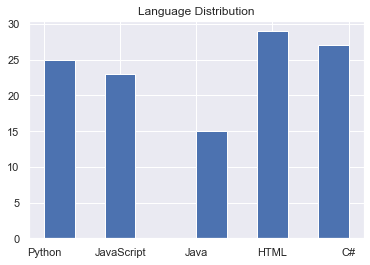

In [10]:
sns.set(font_scale = 1)
df['language'].hist()
plt.title('Language Distribution')
plt.show()

### Data Dictionary

In [11]:
#print(get_data_dictionary(df).to_markdown())

## Target Feature - 'language'

In [12]:
df.language.value_counts(dropna = False)

HTML          29
C#            27
Python        25
JavaScript    23
Java          15
NaN            2
Name: language, dtype: int64

### Acquire takeaway
    - 123 entries in total
    - mostly HTML, C#, Python and JavaScript
    - only three columns

# Prepare

#### Dropped Columns

    No Columns were dropped.

#### Handle Nulls

    There were only two null observations for our target feature.  They got dropped. 

#### Convert Data Types

    No features needed converting of data type. 

#### Rename

    No columns were renamed.

#### Engineered Features

    Three features were engineered: clean, stemmed, and lemmatized. 
    
    'clean'
        - All text was converted to lowercase letters from readme_contents
        - Removed any inconsistencies in unicode character encoding from readme_contents
        - Dropped anything that isn't an ASCII character from readme_contents
        - Removed anything that is not a through z, a number, a single quote, or whitespace from readme_contents
        - Tokenized the readme_contents. In the context of NLP, this means breaking text down into discrete words, punctuation, etc.
        - Removed stop words from readme_contents.  These are usually words that end up having the maximum frequency if you do a simple term or word frequency in a corpus. 
    
    'stemmed'
        - We create new words by attaching affixes in a process known as inflection. For example, "calls", "called", and "calling" all share the base stem "call". Stemmed from clean.
        
    'lemmatized'
        - Lemmatization is very similar to stemming, however, the base form in this case is known as the root word, but not the root stem. The difference is that the root word is always a lexicographically correct word (present in the dictionary), but the root stem may not be so. Lemmatized from clean.

#### Removed Outliers

    - Java only had 15 observations so any repo project written in java got dropped.
    - Ruby only had 1 observation so any repo project written in ruby got dropped.
    - Shell only had 1 observation so any repo with project written in shell got dropped.
        
#### Scaling

    No scaling was preformed.
        
#### Split

    Split data into three data frames:
    
        - train
        - validate
        - test
        
    Used a random_state of 123
    Stratified on our target feature, language

### Prepare Takeaway

    - All features and observations have no null or empty values.
    - test_train_split were stratified on my target feature language

In [13]:
train, validate, test = prepare(acquire())

# Exploration (Brooke & Curtis)

 - Two questions with answers
 - At least two graphs

### First, let's explore the initial hypothesis that ReadME's refer to their own language frequently.
### Additional hypotheses to explore:  
 - Does the average length of ReadME's differ significantly per language?
 - Are there any top bigrams or trigrams per language in train that stand out as meaningful?

****
Exploring inital hypothesis of is the language of the ReadME referenced with high frequency?

In [14]:
ADDITIONAL_STOPWORDS = ['9']

def clean_up(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [19]:
html_words = clean_up(' '.join(train[train.language == 'HTML'].clean))
python_words = clean_up(' '.join(train[train.language == 'Python'].clean))
C_sharp_words = clean_up(' '.join(train[train.language == 'C#'].clean))
JavaScript_words = clean_up(' '.join(train[train.language == 'JavaScript'].clean))

all_words = clean_up(' '.join(train.clean))

In [20]:
html_freq = pd.Series(html_words).value_counts()
python_freq = pd.Series(python_words).value_counts()
C_sharp_freq = pd.Series(C_sharp_words).value_counts()
JavaScript_freq = pd.Series(JavaScript_words).value_counts()
all_freq = pd.Series(all_words).value_counts()



print('Top Ten Words for HMTL ReadMEs')
print(html_freq.head(10))
print ("--------------")
print('Top Ten Words for Python ReadMEs')
print(python_freq.head(10))
print ("--------------")
print('Top Ten Words for C# ReadMEs')
print(C_sharp_freq.head(10))
print ("--------------")
print('Top Ten Words for JavaScript ReadMEs')
print(JavaScript_freq.head(10))
print ("--------------")
print('Top Ten Words for ALL ReadMEs')
print(all_freq.head(10))

Top Ten Words for HMTL ReadMEs
html        66
15001700    62
email       40
use         39
20002200    38
dom         35
img         28
file        23
template    22
php         20
dtype: int64
--------------
Top Ten Words for Python ReadMEs
python       419
video        210
library      205
youtubedl    154
file         152
1            121
use          117
2            112
format       106
bot          100
dtype: int64
--------------
Top Ten Words for C# ReadMEs
var       130
redis     129
new       126
csharp    123
string    106
c          91
server     89
client     74
use        71
value      63
dtype: int64
--------------
Top Ten Words for JavaScript ReadMEs
javascript    286
function      267
const         263
1             231
bad           203
link          195
good          190
return        126
foo           116
b             114
dtype: int64
--------------
Top Ten Words for ALL ReadMEs
python        428
1             389
function      342
use           334
javascript    29

## Takeaway from top ten words:
 - Top ten words seems to confirm the hypothesis that each ReadME does indeed refer to its own language with high frequency.
 - Additionally, domain specific words for thier own language do tend to show up more frequently for each ReadME.

****
Now exploring the average character length by language:

In [21]:
train['length'] = [len(i) for i in train.clean]

In [22]:
print('The mean character length for HTML ReadME')
print(train[train.language == 'HTML'].mean())
print('----------------------------')
print('The mean character length for Python ReadME')
print(train[train.language == 'Python'].mean())
print('----------------------------')
print('The mean character length for C# ReadME')
print(train[train.language == 'C#'].mean())
print('----------------------------')
print('The mean character length for JavaScript ReadME')
print(train[train.language == 'JavaScript'].mean())
print('----------------------------')

The mean character length for HTML ReadME
length    2153.071429
dtype: float64
----------------------------
The mean character length for Python ReadME
length    17470.0
dtype: float64
----------------------------
The mean character length for C# ReadME
length    6262.055556
dtype: float64
----------------------------
The mean character length for JavaScript ReadME
length    14758.384615
dtype: float64
----------------------------


In [23]:
train.groupby(by = 'language').mean()

,length
language,
C#,6262.055556
HTML,2153.071429
JavaScript,14758.384615
Python,17470.000000


### Takeaway looking at character length of ReadMEs:
 - JavaScript ReadMEs appear to be the longest
 - Python and C# are fairly similar in length
 - HTML ReadMEs appear to be the shortest

****
### Moving forward in Explore, let's see if there are bigrams or trigrams that stand out as meaningful:

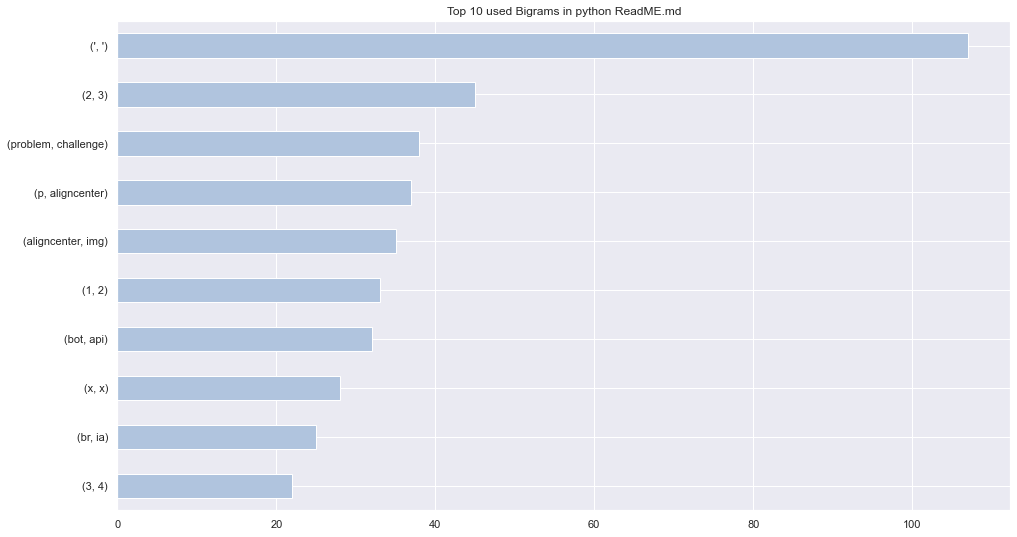

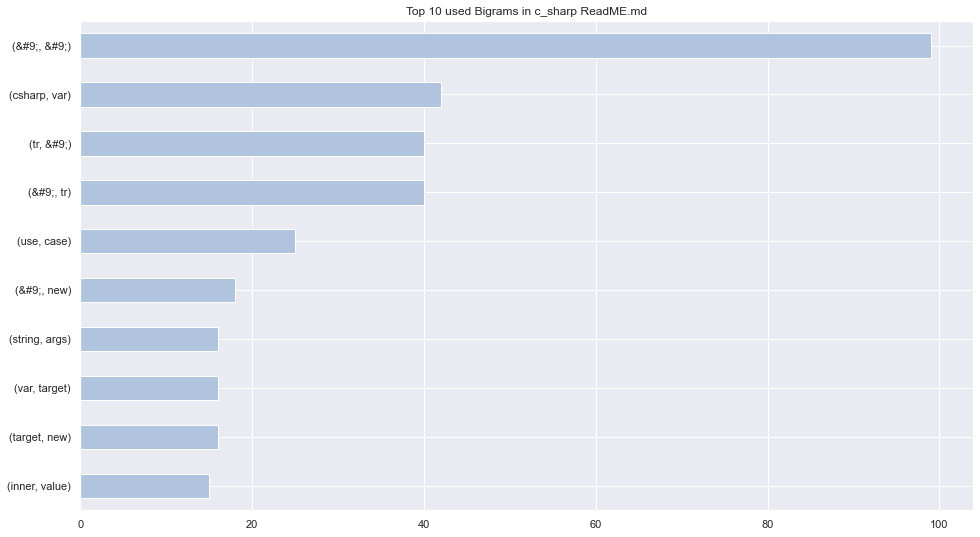

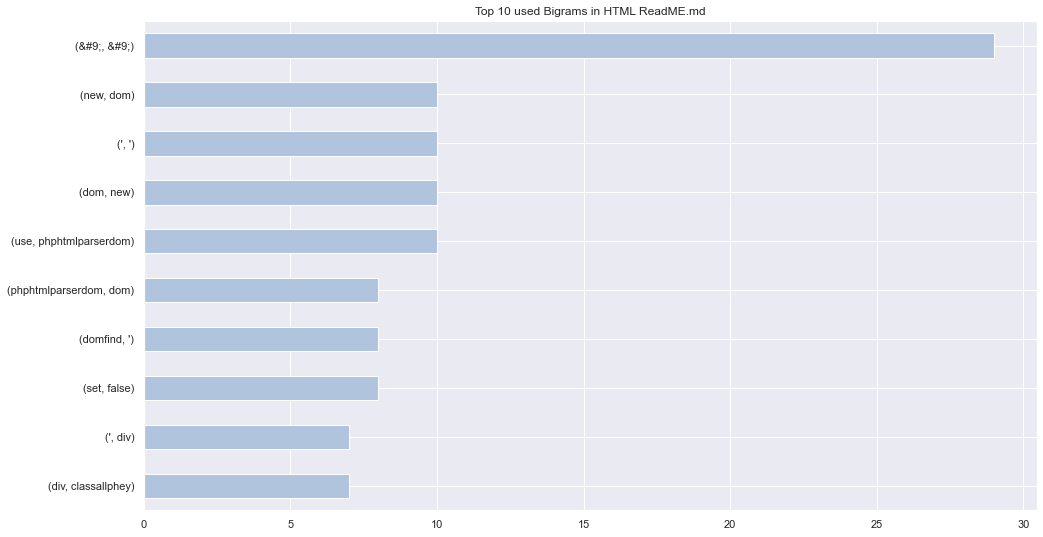

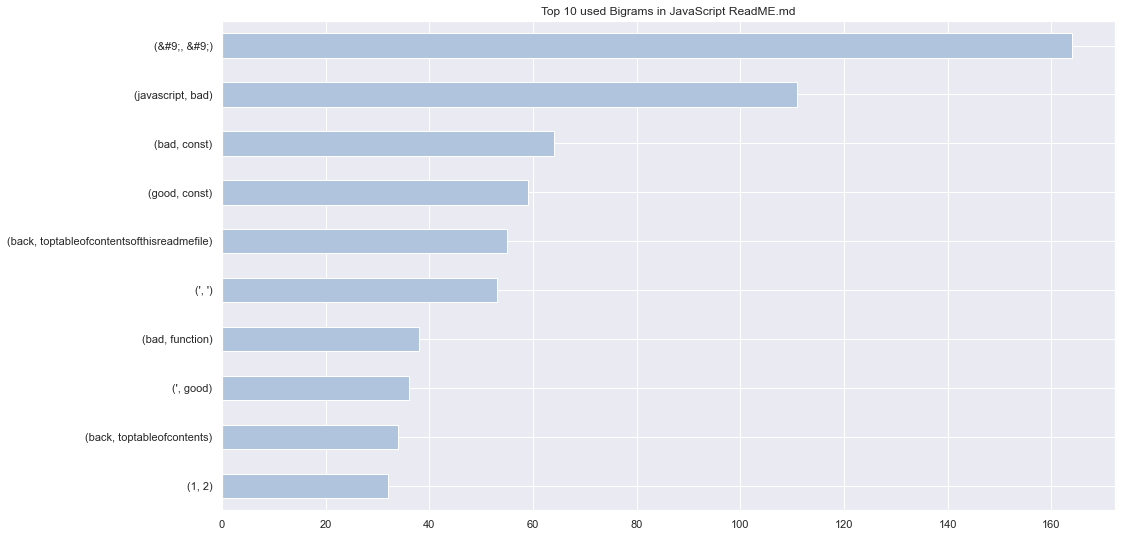

In [26]:
html_top_words = ' '.join(train[train['language'] == 'HTML'].clean)
python_top_words = ' '.join(train[train['language'] == 'Python'].clean)
c_sharp_top_words = ' '.join(train[train['language'] == 'C#'].clean)
JavaScript_top_words = ' '.join(train[train['language'] == 'JavaScript'].clean)

lang_clean_words = {'python':python_top_words,
              'c_sharp':c_sharp_top_words,
              'HTML':html_top_words,
              'JavaScript':JavaScript_top_words}
for key, value in lang_clean_words.items():
    plt.figure(figsize=(16, 9))
    pd.Series(nltk.bigrams(value.split())).value_counts(ascending = True).tail(10).plot.barh(color = 'lightsteelblue')
    plt.title(f'Top 10 used Bigrams in {key} ReadME.md')
    plt.show()


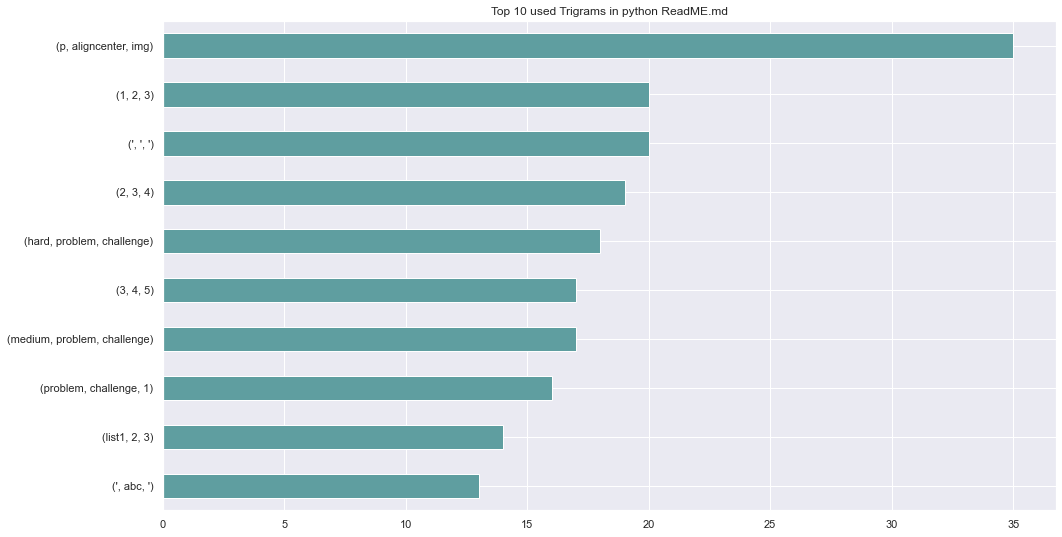

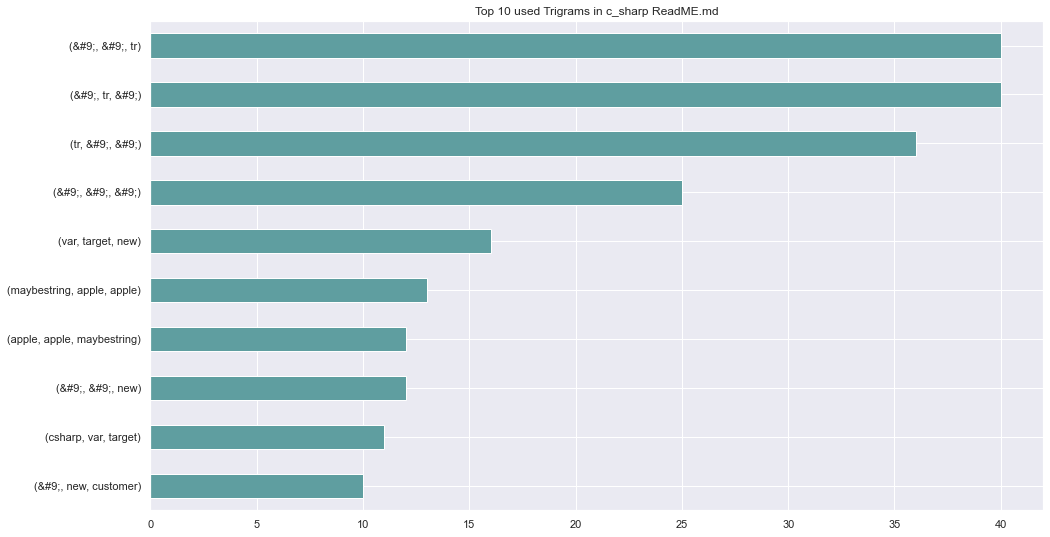

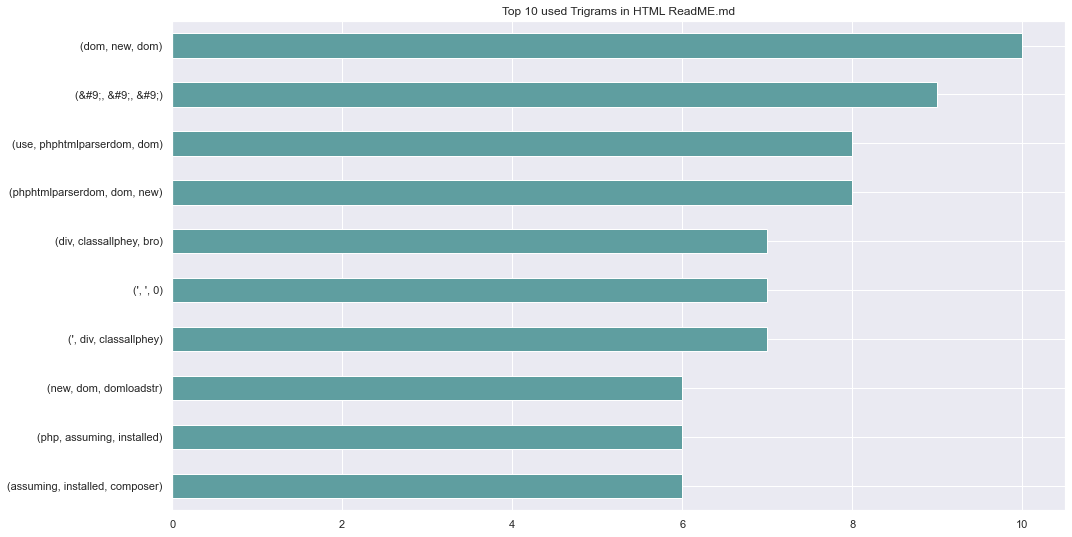

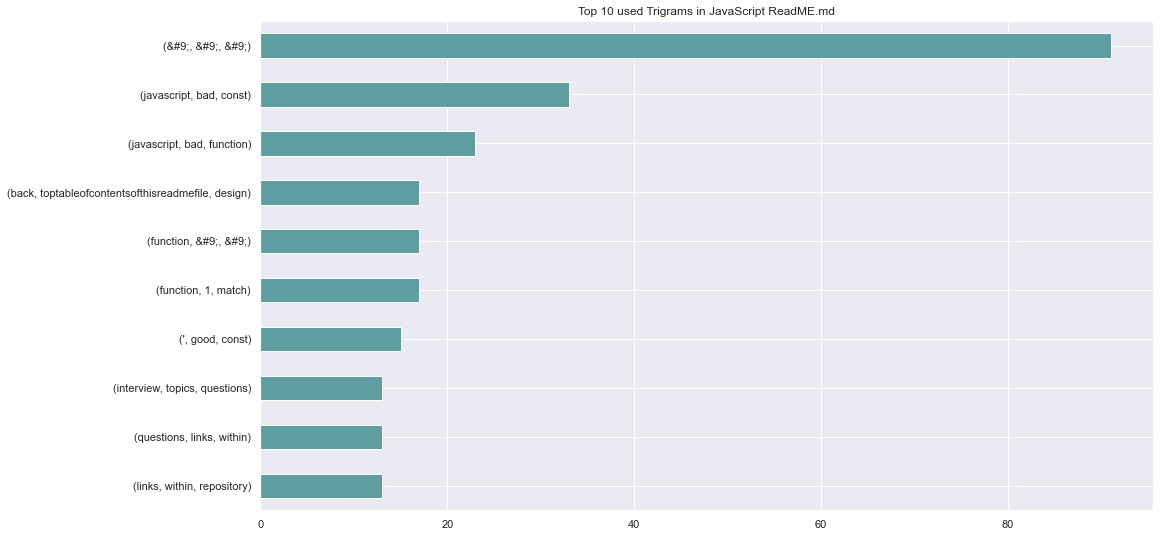

In [27]:
for key, value in lang_clean_words.items():
    plt.figure(figsize=(16, 9))
    pd.Series(nltk.trigrams(value.split())).value_counts(ascending = True).tail(10).plot.barh(color = 'cadetblue')
    plt.title(f'Top 10 used Trigrams in {key} ReadME.md')
    plt.show()

### Key takeaways from Exploring Bigrams and Trigrams:
 - Bigrams could prove most useful as top identifiable characteristics, Although trigrams for C# and JavaScript have some overlap so trigrams may not be as useful.

# Modeling (Brandon)

 - Validate Model results
 - Best Validate Model
 - Test Model

In [39]:
train, validate, test = prepare(acquire())

# Conclusion (Curtis)

- To include recommendation
- To include takeaway

# Thank You